# Procesos de la vida real como distribuciones de probabilidad

## Presentado por:
- Felipe Gabriel Yépez Villacreses - A01658002

## Fecha:
15/05/2023

## Descripción:
Identificar procesos de la vida real que puedan ser modelados mediante una distribución de probabilidad.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
! pip install fitter
from fitter import Fitter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for fitter: filename=fitter-1.5.2-py3-none-any.whl size=25608 sha256=d547df7969cb844bf5aa407ef25ac79086a47ab4a7d7b96f3fdcefdfe2012e63
  Stored in directory: /root/.cache/pip/wheels/eb/50/1d/6d8762c6a9a50d3668e53f98164ba13ca314827fb5ac7ebeaa
Successfully built fitter


## Exploración de Base de Datos
Salarios en el área de Ciencia de Datos en 2023.
Recuperado de: https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023

Esta base de datos se puede utilizar para determinar las condiciones que afectan el salario de un científico de datos con la finalidad de percibir sueldos más altos una vez se logre identificar aquellas condiciones favorables en caso de que hubieran. 

In [ ]:
url = 'https://raw.githubusercontent.com/FelipeYepez/DataScienceSalaries2023/main/ds_salaries.csv'
df = pd.read_csv(url)
df.head(3)

/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1225: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1225: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probab

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S


Variables

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


La base de datos cuenta con un total de 3755 registros referentes a los salarios de trabajos en ciencia de datos. Como se puede observar no se cuenta con valores nulos faltantes.

Existen 11 columnas para clasificar cada registro.
1. _work_year_: año en el que fue pagado el salario.
2. _experience_level_: nivel de experiencia.
3. _employment_type_: tipo de empleo para el rol.
4. _job_title_: rol en el que se trabajó.
5. _salary_: salario total.
6. _salary_currency_: El tipo de moneda del salario
7. _salaryinusd_: salario en USD
8. _employee_residence_: país de residencia del empleado durante el trabajo
9. _remote_ratio_: porcentaje del trabajo realizado remotamente
10. _company_location_: país de la empresa empleadora
11. _company_size_: tamaño de la empresa según número de trabajadores

Las variables anteriores pueden ser clasificadas según su tipo y escala de medición, a continuación el detalle de cada una.

* Variables cuantitativas: datos contables o medibles
    * Escala de razón
        * work_year
        * salary
        * salary_in_usd
* Variables cualitativas: datos categóricos
    * Escala nominal
        * employment_type
        * job_title
        * salary_currency
        * employee_residence
        * company_location
    * Escala ordinal
        * experience_level
        * remote_ratio
        * company_size   

In [ ]:
df['remote_ratio'].replace([0, 50, 100], ['0', '50', '100'], inplace=True)
df.describe()

,work_year,salary,salary_in_usd
count,3755.000000,3.755000e+03,3755.000000
mean,2022.373635,1.906956e+05,137570.389880
std,0.691448,6.716765e+05,63055.625278
min,2020.000000,6.000000e+03,5132.000000
25%,2022.000000,1.000000e+05,95000.000000
50%,2022.000000,1.380000e+05,135000.000000
75%,2023.000000,1.800000e+05,175000.000000
max,2023.000000,3.040000e+07,450000.000000


De la anterior tabla se pueden encontrar las medidas estadísticas de las variables cuantitativas de la base de datos. Se puede encontrar el salario medio y salario medio en dólares estadounidenses.La base de datos cuenta con registros desde el 2020 al 2023.

In [ ]:
df[['experience_level', 'employment_type', 'job_title', 'salary_currency',
          'employee_residence', 'remote_ratio', 'company_location', 
          'company_size']].mode()

,experience_level,employment_type,job_title,salary_currency,employee_residence,remote_ratio,company_location,company_size
0,SE,FT,Data Engineer,USD,US,0,US,M


A través de la moda se puede observar cuáles son los datos más repetidos de cada registro. Se puede observar que la mayor parte de registros representan a un empleado en el nivel de Senior-level trabajando tiempo completo como Data Engineer que se le paga en dólares dado que reside en Estados Unidos y trabaja de forma presencial en su oficina, también ubicada en Estados Unidos con un número total de empleados entre 50 y 250.

## Visualización de Salario en USD

array([[<Axes: xlabel='work_year', ylabel='work_year'>,
        <Axes: xlabel='salary', ylabel='work_year'>,
        <Axes: xlabel='salary_in_usd', ylabel='work_year'>],
       [<Axes: xlabel='work_year', ylabel='salary'>,
        <Axes: xlabel='salary', ylabel='salary'>,
        <Axes: xlabel='salary_in_usd', ylabel='salary'>],
       [<Axes: xlabel='work_year', ylabel='salary_in_usd'>,
        <Axes: xlabel='salary', ylabel='salary_in_usd'>,
        <Axes: xlabel='salary_in_usd', ylabel='salary_in_usd'>]],
      dtype=object)

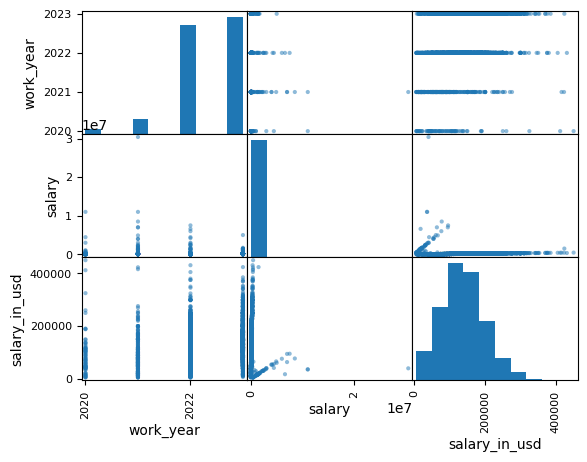

In [ ]:
pd.plotting.scatter_matrix(df)

Como se mencionó anteriormente, esta base de datos es útil para comprender el salario que percibe un científico de datos, por esta razón a continuación se realizará un análisis más detallado de los valores registrados en la base de datos para este registro.

La base de datos cuenta con una columna de salario que se encuentra en la moneda local de cada registro de trabajo, sin embargo, también se cuenta con una columna del salario en dólares estadounidenses (USD). Para el presente trabajo se utilizará la columna de salario en USD dado que se la podrá utilizar para comparar los registros de la base de datos bajo la misma métrica.

Como se puede observar en la gráfica anterior, al contar con registros de salario en modenas diferentes, los registros no guardan relación entre sí y el gráfico de salario muestra agrupación o frecuencia absoluta elevada para valores menores. Esto puede darse al comparar salarios que en monedas diferentes sean representados por valores numéricos más grandes a pesar de que puedan realmente tener menor poder adquisitivo que salarios en otras monedas. 

En el histograma de salario en USD se muestra una distribución más representativa dado que se muestra la distribución representa bajo la misma moneda. Se puede realizar una comparación directa de los datos, algo que no podría suceder si se cuenta con distintas medidas.

A continuación el histograma de salario en USD de forma más amplia.

array([[<Axes: title={'center': 'salary_in_usd'}>]], dtype=object)

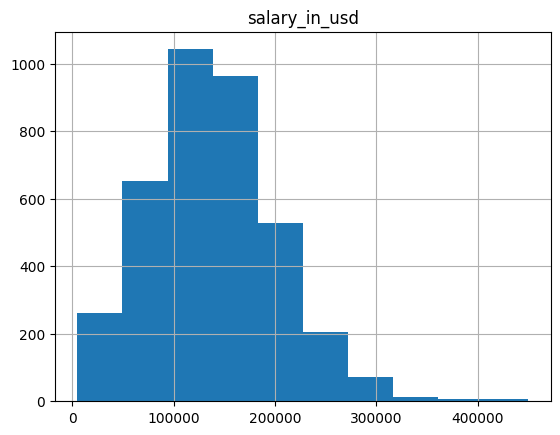

In [ ]:
df.hist(column=['salary_in_usd'])

El histograma del salario en USD es más representativo ya que se puede ver cómo se distribuyen los salarios bajo un mismo parámetro de comparación que en esta caso la misma moneda (USD).

La mayoría de los salarios están agrupados entre sí en los niveles más bajos y se puede observar cómo existen registros con mucha mayor paga, a pesar de que los mismos son escasos comparados al total de registros. El histograma es de igual forma, asimétrico con cierto sesgo hacia la izquierda.

El histograma al dividir por rangos el salario, se parece a una distribución de una variable discreta Poisson por los registros de salarios elevados que se extiende.

<Axes: >

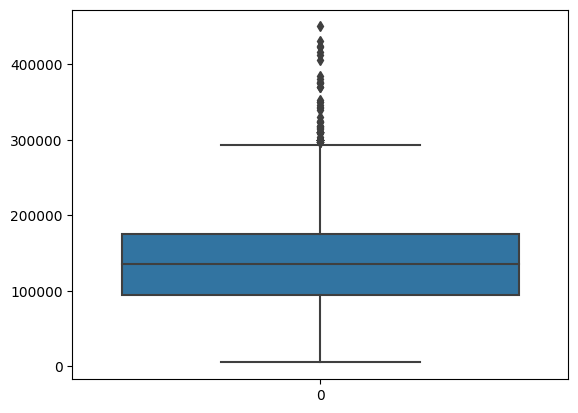

In [ ]:
sns.boxplot(df['salary_in_usd'])

Al realizar un boxplot del salario en USD, se pueden observar que existen algunos valores atípicos por encima del resto. Esto quiere decir que hay ciertos registros cuyo salario fue lo suficientemente alto como para alejarse del resto del conjunto de datos. 

A partir del 3er cuartil los salarios se empiezan a alejar, sucede que el restante de los registros empieza a dispersarse más y sus salarios pueden crecer en mayor medida dejando de guardar tanta relación con el resto de datos.

## Aproximar Distribuciones

Con la finalidad de aproximar la distribución del salario en USD a través del uso de funciones, se utilizará Fitter.

Es importante poder aproximar distribuciones ya que de esta forma se puede identificar la distribución más adecuada de los datos y tener una representación más precisa de los mismos.

Al aproximar la distribución se pueden hacer inferencias estadísticas ya que al conocer los parámetros se pueden calcular probabilidaddes en los datos y ajustar modelos con la finalidad de realizar predicciones ya que muchos de los conceptos estadísticos parten de supuestos referentes a distribución normal de los datos.

Se puede de igual forma resumir los datos y en lugar de trabajar con todos, utilizar la función de ajuste que los representa y resume su distribución de forma más comprensible.

/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1225: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1225: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
Fitting 110 distributions:  69%|██████▉   | 76/110 [06:22<12:47, 22.58s/it]/usr

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gennorm,7.855414e-11,2943.716390,-118250.585167,inf,0.030381,0.001912
exponnorm,7.945251e-11,2851.319103,-118207.885536,inf,0.024888,0.018771
tukeylambda,7.964216e-11,2922.725823,-118198.933020,inf,0.030685,0.001662
vonmises_line,7.982997e-11,2888.105644,-118190.088404,inf,0.029277,0.003137
logistic,8.032066e-11,2887.315168,-118175.309359,inf,0.024612,0.020797


/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1225: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


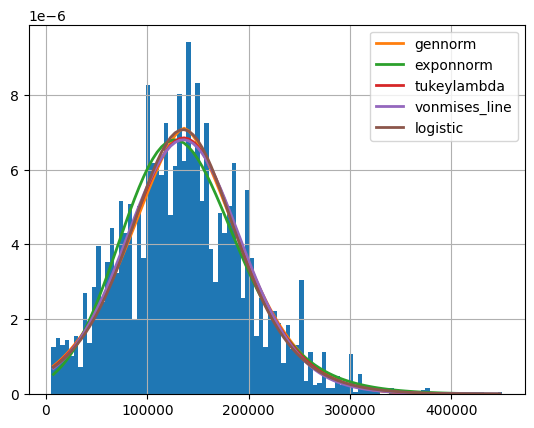

In [ ]:
fitSalario = Fitter(df['salary_in_usd'].values, timeout=120)
fitSalario.fit()
fitSalario.summary()

### Análisis

In [ ]:
print("Mejor distribución con sus parámetros", fitSalario.get_best(method='sumsquare_error'))

Mejor distribución con sus parámetros {'gennorm': {'beta': 1.6370120080058381, 'loc': 136184.49257529987, 'scale': 78667.86672348162}}


Fitter es útil ya que prueba ajustando más de 100 distribuciones para encontrar aquellas que se ajusten de mejor forma a los datos.

Con la finalidad de conocer la distribución que mejor se ajusta, se puede observar en la tabla las mejores 5 distribuciones con sus respectivos valores estadísticos que las evalúan. Para hallar la infromación de aquella que tuvo menor error cuatrático se utiliza la siguiente función.

La distribución que tuvo mejor ajuste fue gennnorm obteniendo un valor cuadrático muy bajo indicando que la distribución gennorm tuvo buen ajuste a los datos con muy poco error.

A través de los criterios AIC y BIC se puede comparar el ajuste con distintos modelos. Se puede observar en la gráfica y en la tabla que varias distribuciones lograron ajustarse bien a los datos por lo que cualquiera de estas puede representar al conjunto de salarios en USD.

En este caso el valor de Kullback-Leibler (KL) no pudo ser calculado por lo que su valor es representado por 'inf' y no se puede conocer la distancia entre la distribución ajustada gennorm y los datos.

El valor de KS es bajo indicando buen ajuste de la distribución ajustada. Este valor mientras más bajo sea, representa mejor ajuste.

Por último el pvalue de ajuste de KS es lo suficientemente bajo para indicar que la prueba de ajuste es significativa indicando que la distribución de ajuste es válida y aceptada.

Por lo general, la distribución gennorm se utiliza para modelar variables continuas con asimetría y colas pesadas. Esta distribucióon cuenta con los parámetros beta y escala (gamma).

Beta determina la forma de la distribución y controla el grado de asimetría de los datos. Si es mayor a 0 indica asimetría positiva, si es menor a 0 indica asimetría negativa mientras que si es igual a 0 indica simetría similar a la de una distribución normal estándar.

El parámetro de escala (gamma) controla la dispersión de los datos, si es mayor a 0 indica mayor dispersión, si es menor a 0 determina menor dispersión y si es igual a 1 produce dispersión similar a una distribución normal estándar

Los parámetros ajustados de la distribución gennorm fueron:
* beta = 1.6370120080058381
* escala = 78667.86672348162

De igual forma se obtuvo un valor de desplazamiento, es decir se dio una traslación horizontal de la distribución.
* loc = 136184.49257529987

#### Interpretación de parámetros
Al haber obtenido un valor de beta mayor a 0, se sabe que el ajuste de la distribución tuvo asimetría positiva.

El valor de escala obtenido muestra que se dio gran dispersión en el ajuste de los datos, pues el parámetro tiene un valor bastante elevado para representar las cifras del salario que se percibe en dólares estadounidenses como científico de datos.

La distribución tuvo una traslación horizontal hacia la derecha que se puede comprender dado que los salarios son mayores a cero y se muestran cifras altas para los mismos.

#### Uso del modelo
A través de los parámetros obtenidos y explicados anteriormnete se puede representar el conjunto de datos de la base de datos con la distribución gennorm ajustada. Se obtiene una ecuación para modelar y representar el conjunto de datos ya que se conoce por los supuestos del modelo y las pruebas estadísticas que es significativo representando correctamente el conjunto de datos.

Se puede aplicar conceptos de probabilidad ya que se conoce a través de los parámetros la distribución de los datos. De igual forma se puede utilizar la distribución de probabilidad para comparar e identificar similitudes con otras distribuciones al ser capaces de obtener valores como la varianza de la distribución y posibles valores que puede tomar.

Fitter fue útil para poder aproximar la distribución de los datos de salarios de científicos de datos con el mejor ajuste posible, obteniendo los parámetros de la distribución para representarla.

Con los parámetros se puede tener la ecuación de la distribución para representar de forma precisa el conjunto de datos. Se la puede utilizar para hacer inferencias estadísticas, calcular probabilidades en los datos y ajustar modelos con la finalidad de realizar predicciones.

Se logró resumir los datos y su distribución con el ajuste de gennorm para obtener una representación más comprensible.




## Referencias

Chaki, A. (2023). Data Science Salaries 2023. Recuperado de https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023 el 15 de mayo de 2023.

Cook, J. (2018, March 30). Generalized Normal Kurtosis. Recuperado de https://www.johndcook.com/blog/2018/03/30/generalized-normal-kurtosis/ el 15 de mayo de 2023.

SciPy.org. (2023, May 15). Continuous distributions: Normal distribution. Recuperado de https://docs.scipy.org/doc/scipy/tutorial/stats/continuous_gennorm.html el 15 de mayo de 2023.